


# <div style="color:white;display:fill;border-radius:5px;background-color:#67a490;letter-spacing:0.1px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;margin:0;font-size:110%;text-align:center">Stroke Prediction Using Patient Data</p></div>

## <b><span style='color:#67a490'>Business Goal</span> </b>
To predict the likelihood of patients experiencing strokes by analyzing their demographic and health-related features,a machine learning predictive model is being developed in this endavour. By leveraging patient data, this model seeks to identify individuals at heightened risk, enabling healthcare providers to implement targeted prevention strategies and personalized care. 
In this notebook, I am exploring and evaluating different machine learning models to find the one that provides the best performance.
<br>

## <b><span style='color:#67a490'>Data Overview</span> </b>

The data consists of 5100 customers with information related to their age, gender, hypertension , heart disease , marital status, work type, residence type , glucose level , bmi , smoking status and stroke data. The data set also contains the customer's ID, which will be dropped before beginning the analysis. 

<font size = 3><b> Environment setup </b></font>
<br>
All the necessary Python libraries for the project are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score  # For Model Implementation
from math import pi # For Performance (radar Chart)
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

## <b>Data Preprocessing</b>

We are using dataset from Kaggle and cleaning up the data for example checking for missing values and filling the missing 'bmi' values with the median.
We are also performing categorical Encoding where categorical features (gender, ever_married, work_type, Residence_type, smoking_status) are converted into numerical representations using Label Encoding.

In [3]:
# Load dataset
df = pd.read_csv('./Project/healthcare-dataset-stroke-data.csv')

# Display first few rows
display(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing numerical values with median
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Verifying missing values are handled 
print("Missing values after filling:\n", df.isnull().sum())



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Missing values after filling:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [5]:
# Encoding categorical variables
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['ever_married'] = label_enc.fit_transform(df['ever_married'])
df['work_type'] = label_enc.fit_transform(df['work_type'])
df['Residence_type'] = label_enc.fit_transform(df['Residence_type'])
df['smoking_status'] = label_enc.fit_transform(df['smoking_status'])

In [51]:
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


Before SMOTE (y_train): Counter({0: 3645, 1: 187})
After SMOTE (y_train): Counter({0: 3645, 1: 3645})


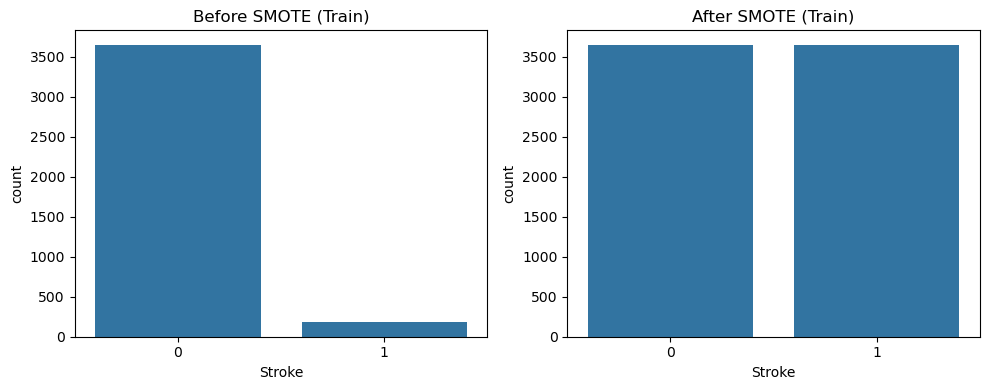

X_train_resampled shape: (7290, 10)
X_test shape: (1278, 10)
y_train_resampled shape: (7290,)
y_test shape: (1278,)


In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# ➤ Feature and target separation
X = df.drop(columns=['id', 'stroke'])
y = df["stroke"]

# ➤ Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=25, stratify=y)

print("Before SMOTE (y_train):", Counter(y_train))

# ➤ Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE (y_train):", Counter(y_train_resampled))

# ➤ Visualizing class distribution
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title("Before SMOTE (Train)")
axs[0].set_xlabel("Stroke")

sns.countplot(x=y_train_resampled, ax=axs[1])
axs[1].set_title("After SMOTE (Train)")
axs[1].set_xlabel("Stroke")

plt.tight_layout()
plt.show()

# ➤ Final dataset shapes
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test shape:", y_test.shape)


## Selection and Saving of the Random Forest Model for Interactive Use
Based on the performance comparison of multiple models trained on the Stroke dataset, the Random Forest model achieved the highest accuracy. Therefore, it was selected as the final model for deployment.

The Random Forest model was trained and then saved as a .pkl (pickle) file to enable reuse without retraining.

This saved model will be loaded into a separate Python script that provides an interactive user experience. The script will prompt users to input relevant parameters, and the trained model will then predict the risk of stroke based on the provided inputs.

In [15]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 1. Train the model using resampled training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 2. Save the trained model to disk
joblib.dump(model, "model-new.pkl")
print("Trained model saved as 'model-new.pkl'")

# 3. Predict on the original test set (untouched by SMOTE)
y_pred = model.predict(X_test)

# 4. Evaluate performance on test set
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Sanity check: Load model and verify prediction match
loaded_model = joblib.load("model-new.pkl")
y_pred_loaded = loaded_model.predict(X_test)
print("Predictions match after loading model:", all(y_pred == y_pred_loaded))

# 6. Print features used
print(" Features used for training:", list(X_train.columns))



Trained model saved as 'model-new.pkl'
Accuracy on test set: 0.8982785602503912

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1216
           1       0.15      0.23      0.18        62

    accuracy                           0.90      1278
   macro avg       0.55      0.58      0.56      1278
weighted avg       0.92      0.90      0.91      1278

Predictions match after loading model: True
 Features used for training: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
